# Laboratorio 1 - Parte 1

### Regresión polinomial múltiple

### 2019 - I

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En este archivo va a encontrar tanto celdas de código como celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [ ]:
#Tomado de https://github.com/rramosp/mooc-grader
from Autentication import *#python 3
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8888)
html

## Primer integrante:

### Leon Dario Arango Amaya
C.C: 1044507887


## Segundo integrante:

### Jose Alberto Arango Sáchez
C.C: 1017246338


In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1: Contextualización del problema

El problema de *regresión* que abordaremos consiste en predecir el valor de la humedad absoluta en el aire, a partir de varias variables sensadas en el aire (Para más información sobre la base de datos y la contextualización del problema, consulte: http://archive.ics.uci.edu/ml/datasets/air+quality). Ejecute la siguiente celda para cargar los datos.

In [148]:
#cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('DB/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter

#Esta es la base de datos AirQuality del UCI Machine Learning Repository.
X = db[:,0:12]
Y = db[:,12]

#### Responda:

1.1 Cuántas muestras tiene la base de datos?: 




In [149]:
print(np.size(X,0))

9357


1.2 Cuántas caracteristicas tiene el problema?: 

In [150]:
print(np.size(X,1))

12


<b>Nota</b>: Agregue una celda en la cual incluya las líneas de código usadas para responder las preguntas.

## Ejercicio 2: Completar código 

Analice los siguientes métodos de la teoría vista para los modelos de *regresión polinomial múltiple*, tales como el error cuadrático medio (<font color='blue'>ECM</font>), modelo de regresión múltiple (<font color='blue'>regression</font>), potencia del polinomio (<font color='blue'>potenciaPolinomio</font>) y gradiente descendente. 

Una vez comprenda su funcionamiento proceda a realizar lo siguiente: 
1. Completar el código de la regla de actualización de los parámetros del algoritmo de <font color='blue'>gradiente_descedente</font>: 

$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$ 

2. Graficar el error cuadrático: Error cuadrático medio (ECM) vs. las iteraciones del algoritmo. La gráfica debe llevar título y los correspondientes nombres de los ejes, puedes consultar documentación [aquí](https://matplotlib.org/tutorials/introductory/pyplot.html).

In [151]:
from __future__ import division

#Error cuadrático medio (criterio para el modelo de regresión polinomial)
def ECM(Y_est,Y):
    N = np.size(Y)
    ecm = np.sum((Y_est.reshape(N,1) - Y.reshape(N,1))**2)/(2*N)
    return ecm 

#Modelo Regresión Múltiple
def regression(X, W):
    Yest = np.dot(X,W)    #con np.dot se realiza el producto matricial. Aquí X es dim [Nxd] y W es dim [dx1]
    return Yest           #Esta variable contiene la salida de f(X,W)


#Potencia de polinomio
def potenciaPolinomio(X,grado):
    X2 = X
    
    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)
    
    return X2


"""Gradiente descendente para regresión lineal múltiple
X: Matriz de datos extendida.
W: Vector de parámetros del modelo
eta: Taza de aprendizaje
"""
   
def gradiente_descendente(X,Y,eta):
     
    #Extendemos la matriz de X para el parámetro independiente
    unos = np.array([np.ones(np.size(X,0))])
    #Concatenamos el vector de unos con la matriz X
    X = np.concatenate((unos.T, X), axis=1)
    X = X.reshape(np.size(X,0),np.size(X,1))
    
    Y = Y.reshape(np.size(Y), 1)
    
    #Tomamos el número de variables del problema
    d = np.size(X,1)
    
    #Tomamos el número de muestras de la base de datos
    N = np.size(X,0)
    
    
    #Inicializamos el vector de parámetros 
    W = np.zeros((1,d))
    W = W.reshape(np.size(W), 1)
    
    eta = eta
    
    iteraciones = 500
    ecms = np.zeros(iteraciones)
    p = eta/N #Constante utilizada dentro de la regla de actualización
    for iter in range(iteraciones):
        error = ECM(regression(X,W),Y)
        ecms[iter] = error
        
        #Aquí debe completar el código con la regla de actualización de los parámetros W. 
        #Tenga en cuenta los nombres de las variables ya creadas: W, X, Y
        loss = regression(X,W) - Y # Equivale a (Y_estimado - Y )
        # Para evitar realizar un ciclo for que itere el número de pesos, hacemos uso de la propiedad transpuesta de
        # las matrices aplicandolo a X,  para poder realizar el producto matricial entre X.T y Loss
        W = W -p*np.dot(X.T,loss)       
        
    print ('Vector de parámetros del modelo:\n')
    print (W)
    print ('\nError Final durante el entrenamiento = ' + str(ecms[-1]))
    
    #Aquí debe completar el código para realizar la gráfica de ecms vs. iteraciones
    plt.plot(ecms) #.plot al mandarle el vector de errores realizara la gráfica considerando el índice como valor del eje X y en el eje Y considerara el valor en ese posición.
    plt.xlabel('Iteraciones')
    plt.ylabel('ECM')
    plt.show()    
    return W,ecms[-1]   

## Ejercicio 3: Entrenamiento

En este punto debe hacer uso de las funciones escritas en el punto anterior para realizar el proceso de *modelamiento y simulación* de los datos de cargados en el Ejercicio # 1 sobre la predicción del valor de la humedad absoluta en el aire 

A continuación complete el siguiente código llamando a la función <font color='blue'>gradiente_descedente</font> pasandole los parámetros correspondientes (X,y,eta). Debe obtener como salida el vector de parámetros $w$ estimado y la gráfica del error cuadrático medio vs iteraciones.

*Nota*: No olvide definir el grado del polinomio y la taza de aprendizaje (eta)

Vector de parámetros del modelo:

[[-0.03558286]
 [-0.007918  ]
 [ 0.15133837]
 [ 0.00093386]
 [ 0.19286465]
 [ 0.12758939]
 [-0.01766481]
 [ 0.12403046]
 [-0.01095359]
 [ 0.13629102]
 [ 0.10329616]
 [ 0.19229168]
 [ 0.18536155]]

Error Final durante el entrenamiento = 774.0544407909563


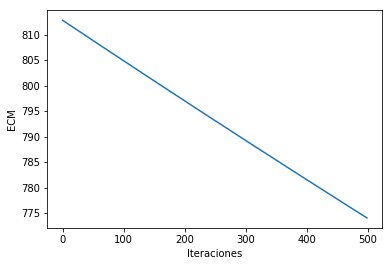


Error durante la prueba = 703.3758081471533


In [152]:
from numpy import random
import math
N = np.size(X,0)

# #Se modifica la matriz de datos original de acuerdo al grado del polinomio ingresado para el modelo
grado = 1
X2 = potenciaPolinomio(X,grado)

#Dejamos algunas muestras para el proceso de entrenamiento y otras para evaluar qué tan bueno fue el aprendizaje del modelo
random.seed(1)
ind=np.random.permutation(N)
Xtrain = X2[ind[0:int(math.ceil(0.7*N))],:]
Xtest = X2[ind[int(math.ceil(0.7*N)):N],:]
Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
Ytest = Y[ind[int(math.ceil(0.7*N)):N]]

#Normalizamos los datos
media = np.mean(Xtrain)
desvia = np.std(Xtrain)
Xtrain = stats.stats.zscore(Xtrain)
Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

eta = 0.00001 

#Complete la siguiente línea de código llamando el método gradiente_descendente con sus respectivos argumentos

W,errorTrain = gradiente_descendente(Xtrain,Ytrain,eta)

#Evaluamos las predicciones del modelo con los datos de test
unos = np.array([np.ones(np.size(Xtest,0))])
Xtest = np.concatenate((unos.T, Xtest), axis=1)
Xtest = Xtest.reshape(np.size(Xtest,0),np.size(Xtest,1))
Yest = regression(Xtest, W)
Error = ECM(Yest,Ytest)
print ('\nError durante la prueba = ' + str(Error))

#### Responda:

3.1 ¿Cuál es el número de coeficientes $w$ que se obtienen al ingresar un polinomio de grado 4? ¿Por qué?:



In [153]:
print(np.size(potenciaPolinomio(X,4),1)+1)

49


**R//:** Son 49 dado que si tenemos una matriz (X) con 12 características
el algoritmo de potencia Polinomio, le agregaría el valor de las potencias 
a esta matriz y en cada grado ganaría 12 columnas más, por lo tanto 12 x grado(4) = 48 + 1 
que es el término independiente.


3.2 La funci&oacute;n polin&oacute;mica que se est&aacute; usando para grados mayores a 1
est&aacute; incompleta, ¿Por qu&eacute;?:

**R//:** No se consideran las combinaciones entre variables, sólo potencias independientes  por ejemplo: X0*X1 , X2*X3, etc.

## Ejercicio 4: Obtener resultados

Identifique la variable "eta" (tasa de aprendizaje $\eta$) en el código anterior, cambie su valor de acuerdo a la siguiente tabla. Haga lo mismo con el valor del grado del polinomio y complete las columnas ECM_Entrenamiento y ECM_Prueba.

Tenga en cuenta que cuando el valor de $\eta$ sea $0.00001$ y el grado del polinomio sea $1$, el valor del ECM de prueba debe ser $703.376$. Esto le servirá de criterio de verificación para la implementación de su algorítmo de gradiente descendente.


In [154]:
import numpy as np
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Tasa de aprendizaje' : pd.Series(['1e-5', '1e-5', '1e-5', '1e-5', '1e-5', '1e-3', '1e-3', '1e-3', '1e-3', '1e-3', '1e-1', '1e-1', '1e-1', '1e-1', '1e-1']),
    'Grado del polinomio' : pd.Series([1,2,3,4,5,1,2,3,4,5,1,2,3,4,5])})
df_types["ECM_Entrenamiento"] = ""
df_types["ECM_Prueba"] = ""
df_types.set_index(['Tasa de aprendizaje','Grado del polinomio'], inplace=True)
df_types["ECM_Entrenamiento"][0] = "774.055"
df_types["ECM_Prueba"][0] = "703.376"
df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [155]:
qgrid_widget.get_changed_df()

ECM_Entrenamiento ECM_Prueba
Tasa de aprendizaje Grado del polinomio                             
1e-1                1                                               
                    2                                               
                    3                                               
                    4                                               
                    5                                               
1e-3                1                                               
                    2                                               
                    3                                               
                    4                                               
                    5                                               
1e-5                1                             774.055    703.376
                    2                                               
                    3                                               
                    4                                               
                    5

### A continuación se replicarán los métodos de gradiente descendente y implementación de este con el fin de resolver el ejercicio 4 sin modificar los mismo

In [156]:
def Mygradiente_descendente(X,Y,eta):
     
    #Extendemos la matriz de X para el parámetro independiente
    unos = np.array([np.ones(np.size(X,0))])
    #Concatenamos el vector de unos con la matriz X
    X = np.concatenate((unos.T, X), axis=1)
    X = X.reshape(np.size(X,0),np.size(X,1))
    
    Y = Y.reshape(np.size(Y), 1)
    
    #Tomamos el número de variables del problema
    d = np.size(X,1)
    
    #Tomamos el número de muestras de la base de datos
    N = np.size(X,0)
    
    
    #Inicializamos el vector de parámetros 
    W = np.zeros((1,d))
    W = W.reshape(np.size(W), 1)
    
    eta = eta
    
    iteraciones = 500
    ecms = np.zeros(iteraciones)
    p = eta/N #Constante utilizada dentro de la regla de actualización
    for iter in range(iteraciones):
        error = ECM(regression(X,W),Y)
        ecms[iter] = error
        
        #Aquí debe completar el código con la regla de actualización de los parámetros W. 
        #Tenga en cuenta los nombres de las variables ya creadas: W, X, Y
        loss = regression(X,W) - Y # Equivale a (Y_estimado - Y )
        # Para evitar realizar un ciclo for que itere el número de pesos, hacemos uso de la propiedad transpuesta de
        # las matrices aplicandolo a X,  para poder realizar el producto matricial entre X.T y Loss
        W = W -p*np.dot(X.T,loss)       
        
    return W,ecms[-1]  

In [157]:
from numpy import random
import math

def ECMentrenamientoPrueba(eta,grado,normalize):
    N = np.size(X,0)
    # #Se modifica la matriz de datos original de acuerdo al grado del polinomio ingresado para el modelo
    grado = grado
    X2 = potenciaPolinomio(X,grado)

    #Dejamos algunas muestras para el proceso de entrenamiento y otras para evaluar qué tan bueno fue el aprendizaje del modelo
    random.seed(1)
    ind=np.random.permutation(N)
    Xtrain = X2[ind[0:int(math.ceil(0.7*N))],:]
    Xtest = X2[ind[int(math.ceil(0.7*N)):N],:]
    Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
    Ytest = Y[ind[int(math.ceil(0.7*N)):N]]

    #Normalizamos los datos
    if(normalize):        
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

    eta = eta 

    #Complete la siguiente línea de código llamando el método gradiente_descendente con sus respectivos argumentos

    W,errorTrain = Mygradiente_descendente(Xtrain,Ytrain,eta)

    #Evaluamos las predicciones del modelo con los datos de test
    unos = np.array([np.ones(np.size(Xtest,0))])
    Xtest = np.concatenate((unos.T, Xtest), axis=1)
    Xtest = Xtest.reshape(np.size(Xtest,0),np.size(Xtest,1))
    Yest = regression(Xtest, W)
    errorTest = ECM(Yest,Ytest)    
    return errorTrain,errorTest

In [158]:
def testWithEtasAndGrade(normalize=True,etas=['1e-1', '1e-1', '1e-1', '1e-1', '1e-1', '1e-3', '1e-3', '1e-3', '1e-3', '1e-3', '1e-5', '1e-5', '1e-5', '1e-5', '1e-5'],grades=[1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]):
    randn = np.random.randn
    df_type = pd.DataFrame({
        'Tasa de aprendizaje' : pd.Series(etas),
        'Grado del polinomio' : pd.Series(grades)})
    df_type["ECM_Entrenamiento"] = ""
    df_type["ECM_Prueba"] = ""
    df_type.set_index(['Tasa de aprendizaje','Grado del polinomio'], inplace=True)

    etas =[0.1,0.001,0.00001]

    erroTrainList=[]
    errorTestList=[]
    cont=0
    for i in range(len(etas)):
        for j in range(1,6):
            erroTrain,errorTest=ECMentrenamientoPrueba(etas[i],j,normalize)
            erroTrainList.append(erroTrain)
            errorTestList.append(errorTest)
            df_type["ECM_Entrenamiento"][cont] = str(erroTrain)
            df_type["ECM_Prueba"][cont] = str(errorTest)
            cont=cont+1
    df_type.sort_index(inplace=True)
    myQgrid_widget = qgrid.show_grid(df_type, show_toolbar=False)    
    return myQgrid_widget 

In [159]:
testWithEtasAndGrade()
myQgrid_widget.get_changed_df()

ECM_Entrenamiento  \
Tasa de aprendizaje Grado del polinomio                           
1e-1                1                        0.9775752961991924   
                    2                       0.07845199979234524   
                    3                      0.026102487460899704   
                    4                      0.011738944770606937   
                    5                    1.5603169565477235e+61   
1e-3                1                         47.35025615066433   
                    2                         19.39505680915447   
                    3                         13.53232189764733   
                    4                        11.345170378458585   
                    5                        10.481429642201135   
1e-5                1                         774.0544407909563   
                    2                         748.1860686316447   
                    3                         724.9884414455062   
                    4                         703.4089638629132   
                    5                         682.8442125040657   

                                                     ECM_Prueba  
Tasa de aprendizaje Grado del polinomio                          
1e-1                1                        1323.8770206809477  
                    2                         778.5218253112232  
                    3                          690.233116765249  
                    4                         680.6499964607167  
                    5                    1.4752669004688898e+60  
1e-3                1                        432.23837215035917  
                    2                         666.7086861202494  
                    3                         714.7263534639739  
                    4                         716.3726048028661  
                    5                         711.2596887212198  
1e-5                1                         703.3758081471533  
                    2                         709.8817822551225  
                    3                         709.8470702955602  
                    4                         711.3700120556157  
                    5                         711.4024391442923

## Ejercicio 5: Pruebas

En la celda de código del Ejercicio # 3, comente la línea donde se normalizan las matrices de datos Xtrain y Xtest. Realice pruebas para diferentes valores de $\eta$ y de grado del polinomio de manera similar a los valores que usó en el punto 3. Observe que pasa con el ECM.

#### Responda

4.1 Qué sucede con los valores del ECM?



In [161]:
etas=['1e-1', '1e-1', '1e-1', '1e-1', '1e-1', '1e-3', '1e-3', '1e-3', '1e-3', '1e-3', '1e-5', '1e-5', '1e-5', '1e-5', '1e-5']
grades=[1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]

In [162]:
testWithEtasAndGrade(False,etas,grades)

/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: Ru

/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: Ru

/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/josearangos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: R

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

**R//:** Esta siendo mas grande que él al máximo valor que puede almacenar la variable, por lo tanto ocurre un desbordamiento.

4.2 A qué se debe lo que observa?


**R//:** A la diferencia de escalas presentes entre las diferentes características.

4.3 ¿Qu&eacute; proceso hace la normalizaci&oacute;n sobre los datos? Consulte por qu&eacute; es necesaria la normalizaci&oacute;n en el modelo de regresi&oacute;n log&iacute;stica y cu&aacute;les son los tipos de normalizaci&oacute;n m&aacute;s comunes. ¿Cu&aacute;l de ellos se aplic&oacute; en el laboratorio?

- ¿Qué proceso hace la normalización sobre los datos?
- **R//:** Ajustar los valores medidos en diferentes escalas respecto a una escala común.
- ¿Por qué es necesaria la normalización en el modelo de regresión logística y cuáles son los tipos de normalización más comunes?
- **R//:** Es necesaria para llegar a la convergencia de una manera mas rapida
- **Normalizaciones más comunes**
- Puntuación estándar (Z-score)
- T de student
- Studentized Residual
- Momento estandarizado
- Coeficiente de variación
- Característica scaling
- ¿Cuál de ellos se aplicó en el laboratorio?
- **R//:** puntuación estándar o Z-score
![image.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/5ceed701c4042bb34618535c9a902ca1a937a351)